In [1]:
#FINANCE HOMEWORK 2 - 2000-2008
#DANDI CHEN, PUJA SUBRAMANIAM, DERRICK HUNG

#import
from pandas import Series, DataFrame
import pandas as pd
import re
from datetime import datetime
import copy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#get summary 2008
summary = pd.read_csv('fundsummarypre200888.csv')
summary = summary.fillna(0)
#keep the stocks that only invests in common stock
summary['non_common_stock'] = summary['per_pref']+summary['per_conv']+summary['per_corp']\
                                +summary['per_muni']+summary['per_govt']+summary['per_oth']\
                                +summary['per_cash']+summary['per_bond']
mask_only_com_stock = (summary['non_common_stock'] ==0)
summary['date'] = pd.to_datetime(summary['caldt'],format='%Y%m%d')
summary

,summary_period2,crsp_fundno,caldt,nav_latest,per_com,per_pref,per_conv,per_corp,per_muni,per_govt,...,per_cash,per_bond,fund_name,end_dt,lipper_class,lipper_class_name,lipper_obj_cd,lipper_obj_name,non_common_stock,date
0,AQ,50,20001229,17.5800,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
1,AQ,67,20001229,9.5900,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
2,AQ,84,20001229,8.2900,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
3,AQ,85,20001229,8.3200,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
4,AQ,86,20001229,8.3100,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
5,AQ,94,20001229,9.1000,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
6,AQ,95,20001229,9.0900,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,0.0,0,0,0,0,0.00,2000-12-29
7,AQ,105,20001229,12.3700,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,American Pension Investors Trust: Growth Fund,20190628.0,GL,Global Funds,GL,Global Funds,0.00,2000-12-29
8,AQ,105,20011231,9.8400,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,American Pension Investors Trust: Growth Fund,20190628.0,GL,Global Funds,GL,Global Funds,0.00,2001-12-31
9,AQ,105,20021231,7.1600,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,American Pension Investors Trust: Growth Fund,20190628.0,GL,Global Funds,GL,Global Funds,0.00,2002-12-31


In [3]:
#filter out the funds are small cap
list1 = ['SCCE','SCGE','SCVE']
mask1 = (summary['lipper_class'] == 'SCCE')
mask2 = (summary['lipper_class'] == 'SCGE')
mask3 = (summary['lipper_class'] == 'SCVE')
mask4 = (summary['lipper_obj_cd'] == 'SG')
summary_small = summary[mask1|mask2|mask3|mask4]
summary_small

,summary_period2,crsp_fundno,caldt,nav_latest,per_com,per_pref,per_conv,per_corp,per_muni,per_govt,...,per_cash,per_bond,fund_name,end_dt,lipper_class,lipper_class_name,lipper_obj_cd,lipper_obj_name,non_common_stock,date
49,AQ,479,20001229,10.31,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,The DLB Fund Group: DLB Enterprise III Fund,20001229.0,SCVE,Small-Cap Value Funds,MC,Mid-Cap Funds,0.00,2000-12-29
142,AQ,2697,20011231,10.30,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,AAL Mutual Funds: AAL Small Cap Index Fund II;...,20040430.0,SCCE,Small-Cap Core Funds,SG,Small-Cap Funds,0.00,2001-12-31
143,AQ,2697,20021231,8.59,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,AAL Mutual Funds: AAL Small Cap Index Fund II;...,20040430.0,SCCE,Small-Cap Core Funds,SG,Small-Cap Funds,0.00,2002-12-31
144,AQ,2697,20031231,11.64,93.89,0.0,0.0,0.0,0.0,0.0,...,4.33,0.00,AAL Mutual Funds: AAL Small Cap Index Fund II;...,20040430.0,SCCE,Small-Cap Core Funds,SG,Small-Cap Funds,6.11,2003-12-31
208,AQ,2727,20021231,10.25,93.35,0.0,0.0,0.0,0.0,0.0,...,5.11,0.48,AB Funds Trust: Small Cap Equity Fund; Retirem...,20190628.0,SCCE,Small-Cap Core Funds,SG,Small-Cap Funds,6.65,2002-12-31
209,AQ,2727,20031231,14.99,93.78,0.0,0.0,0.0,0.0,0.0,...,5.74,0.42,AB Funds Trust: Small Cap Equity Fund; Retirem...,20190628.0,SCCE,Small-Cap Core Funds,SG,Small-Cap Funds,6.22,2003-12-31
210,AQ,2727,20041231,16.48,93.78,0.0,0.0,0.0,0.0,0.0,...,5.74,0.42,AB Funds Trust: Small Cap Equity Fund; Retirem...,20190628.0,SCCE,Small-Cap Core Funds,SG,Small-Cap Funds,6.22,2004-12-31
211,AQ,2727,20051230,15.61,94.39,0.0,0.0,0.0,0.0,0.0,...,4.11,0.00,AB Funds Trust: Small Cap Equity Fund; GS4 Cla...,20190628.0,SCCE,Small-Cap Core Funds,SG,SMALL-CAP FUNDS,5.27,2005-12-30
212,AQ,2727,20061229,16.00,58.84,0.0,0.0,0.0,0.0,0.0,...,37.61,0.00,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,Small-Cap Core Funds,SG,SMALL-CAP FUNDS,41.16,2006-12-29
213,AQ,2727,20071231,14.31,44.49,0.0,0.0,0.0,0.0,0.0,...,44.27,3.94,GuideStone Funds: Small Cap Equity Fund; GS4 C...,20190628.0,SCCE,Small-Cap Core Funds,SG,SMALL-CAP FUNDS,55.52,2007-12-31


In [4]:
#get data from the returns table
returnraw = pd.read_csv('fundreturnpre20088.csv')
returnraw = returnraw.fillna(0)
returnraw['date'] = pd.to_datetime(returnraw['caldt'],format='%Y%m%d')


/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#merge to get the small cap and its return and years
merged = summary_small.merge(returnraw, left_on= ['crsp_fundno','caldt'],right_on =['crsp_fundno','caldt'],suffixes = ['_sum','_return'])

In [6]:
merged.iloc[0]

summary_period2                                               AQ
crsp_fundno                                                  479
caldt                                                   20001229
nav_latest                                                 10.31
per_com                                                        0
per_pref                                                       0
per_conv                                                       0
per_corp                                                       0
per_muni                                                       0
per_govt                                                       0
per_oth                                                        0
per_cash                                                       0
per_bond                                                       0
fund_name            The DLB Fund Group: DLB Enterprise III Fund
end_dt                                               2.00012e+07
lipper_class             

In [7]:
merged = merged [['date_sum','crsp_fundno','nav_latest','mtna','mret','mnav']]

In [8]:
#cutoff one: 50 and more than 50 
merged['year'] = merged['date_sum'].dt.to_period('Y').astype(str)
merged['mret']=merged['mret'].apply(pd.to_numeric)

In [9]:
merged['size'] = 0
def lorsmall(mt):
    if mt >50:
        return 'large'
    else:
        return 'small'    
merged['size'] = merged['mtna'].map(lorsmall)

In [10]:
mergedsmall = merged[merged['size'] == 'small']
mergedlarge = merged[merged['size'] == 'large']

In [11]:

small_mret =mergedsmall.groupby(['date_sum'])[['mret']].mean()
large_mret =mergedlarge.groupby(['date_sum'])[['mret']].mean()


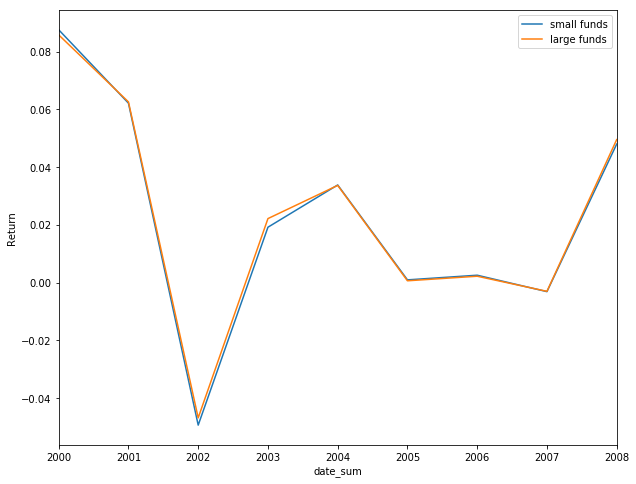

In [12]:
# graph
fig= plt.figure(figsize=(10,8))
small_mret['mret'].plot(label='small funds')
large_mret['mret'].plot(label='large funds')

#show graph
ylabel('Return')
legend(loc='best')
show()

In [16]:
#create a functions that takes an value for cutoff and then generate a line graph based on that cut off
#everything below this cell is the result ran from different cut offs
def runcutoff(number):
    merged['size'] = 0
    def lorsmall(mt):
        if mt >number:
            return 'large'
        else:
            return 'small'    
    merged['size'] = merged['mtna'].map(lorsmall)
    mergedsmall = merged[merged['size'] == 'small']
    mergedlarge = merged[merged['size'] == 'large']
    small_mret =mergedsmall.groupby(['date_sum'])[['mret']].mean()
    large_mret =mergedlarge.groupby(['date_sum'])[['mret']].mean()
    fig= plt.figure(figsize=(10,8))
    small_mret['mret'].plot(label='small funds')
    large_mret['mret'].plot(label='large funds')

    #show graph
    ylabel('Return')
    legend(loc='best')
    show()


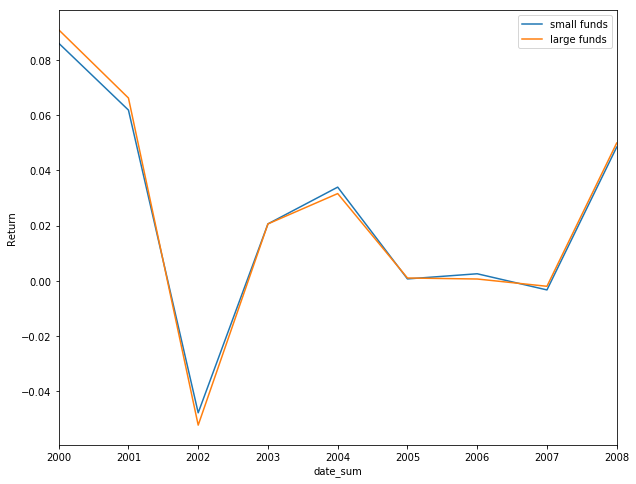

In [17]:
runcutoff(5000)

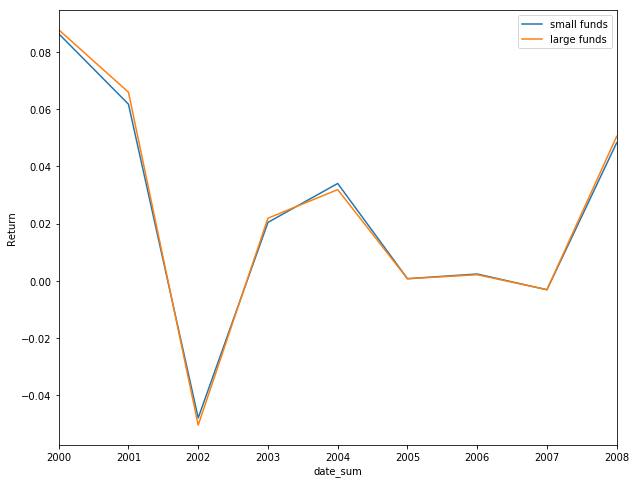

In [18]:

runcutoff(1000)

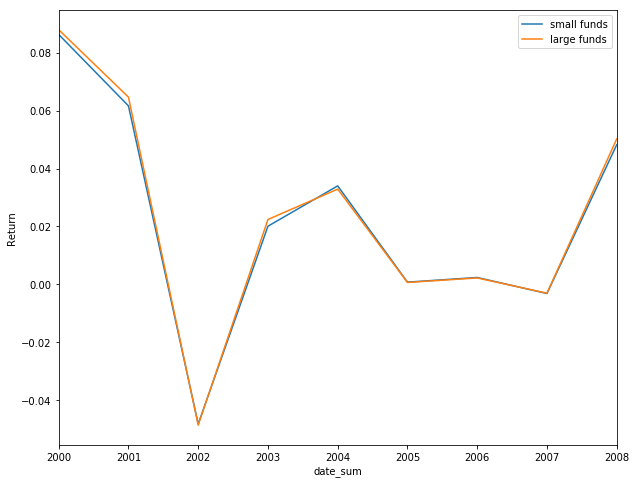

In [19]:
runcutoff(300)

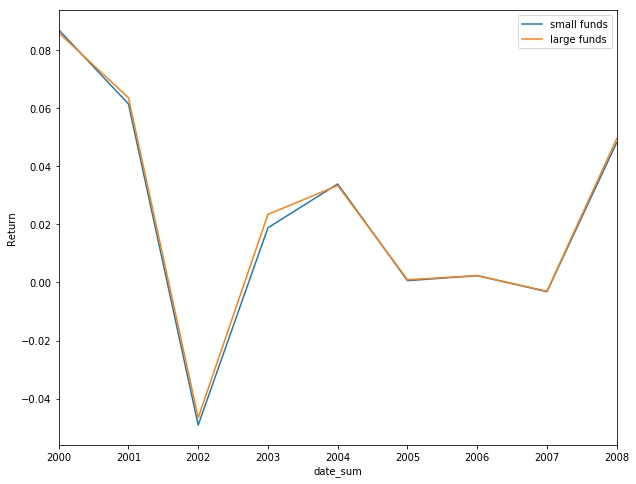

In [20]:
runcutoff(100)

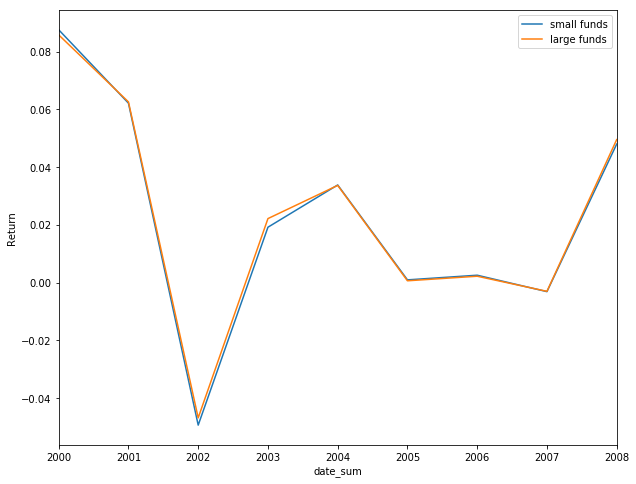

In [21]:
runcutoff(50)

In [ ]:
runcutoff(20)

In [ ]:
runcutoff(10)

In [ ]:
runcutoff(5)

In [ ]:
runcutoff(1)

In [ ]:
runcutoff(0.5)

In [ ]:
fig, (Ax1, Ax2, Ax3) = subplots(nrows=1,
                                ncols=3,
                                sharex=False,
                                sharey=True,
                               )

